<a href="https://colab.research.google.com/github/RihamSayyed/MyPortfolioProjects/blob/main/My__chatbott.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import tensorflow as tf

In [40]:
import numpy as np 
import pandas as pd
import json


In [41]:
import nltk

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [43]:
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten

In [44]:
from tensorflow.keras.models import Model

In [45]:
import matplotlib.pyplot as plt

In [105]:
with open("intents.json", encoding='utf-8-sig') as content:
  data1=json.load(content)

In [106]:
tags = []
inputs = []
responses = {}
for intent in data1["intents"]:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [107]:
data=pd.DataFrame({"inputs":inputs,
                   "tags":tags})

In [108]:
data

,inputs,tags
0,Hi,greeting
1,Is anyone there?,greeting
2,Hello,greeting
3,Good day,greeting
4,Whats up,greeting
...,...,...
80,Will you open the pod bay door,PodBayDoor
81,Open the pod bay door please,PodBayDoor
82,Can you open the pod bay door please,PodBayDoor
83,Will you open the pod bay door please,PodBayDoor


In [109]:
data.shape

(85, 2)

In [110]:
data = data.sample(frac=1)

In [111]:
data

,inputs,tags
32,What do you think I am?,CurrentHumanQuery
79,Can you open the pod bay door,PodBayDoor
19,what is your name,name
34,What name do you call me by?,CurrentHumanQuery
30,What do you call me?,CurrentHumanQuery
...,...,...
47,Comprendo,UnderstandQuery
65,Tell me a joke,Jokes
73,Why can you not open the pod bay door,PodBayDoorResponse
26,what are your hours,hours


In [112]:
from  tensorflow.keras.preprocessing.text import Tokenizer


In [113]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
32,what do you think i am,CurrentHumanQuery
79,can you open the pod bay door,PodBayDoor
19,what is your name,name
34,what name do you call me by,CurrentHumanQuery
30,what do you call me,CurrentHumanQuery
...,...,...
47,comprendo,UnderstandQuery
65,tell me a joke,Jokes
73,why can you not open the pod bay door,PodBayDoorResponse
26,what are your hours,hours


In [114]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [115]:
input_shape = x_train.shape[1]
print(input_shape)

9


In [116]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  90
output length:  14


In [117]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [118]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [119]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 2s 9ms/step - loss: 2.6378 - accuracy: 0.0941
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 2.6339 - accuracy: 0.1176
Epoch 3/200
3/3 [==============================] - 0s 9ms/step - loss: 2.6311 - accuracy: 0.1176
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 2.6280 - accuracy: 0.1529
Epoch 5/200
3/3 [==============================] - 0s 7ms/step - loss: 2.6246 - accuracy: 0.2118
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 2.6213 - accuracy: 0.2824
Epoch 7/200
3/3 [==============================] - 0s 7ms/step - loss: 2.6172 - accuracy: 0.2941
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 2.6131 - accuracy: 0.2824
Epoch 9/200
3/3 [==============================] - 0s 13ms/step - loss: 2.6081 - accuracy: 0.2588
Epoch 10/200
3/3 [==============================] - 0s 7ms/step - loss: 2.6041 - accuracy: 0.2588
Epoch 11/200
3/3 [==========

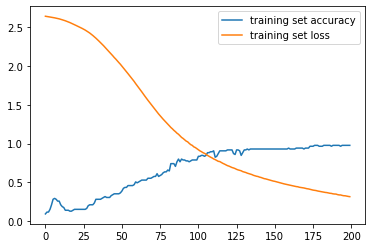

In [120]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [121]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Chat Bot : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : hi
1/1 [==============================] - 0s 430ms/step
Chat Bot :  Hi there, how can I help?
You : what is your name
1/1 [==============================] - 0s 18ms/step
Chat Bot :  You can call me Bot.
You : how old are you
1/1 [==============================] - 0s 20ms/step
Chat Bot :  18 years young!
You : who am i
1/1 [==============================] - 0s 21ms/step
Chat Bot :  Jim, I just don't have the power
You : what do you think i am
1/1 [==============================] - 0s 17ms/step
Chat Bot :  They call you <HUMAN>, what can I do for you?
You : tell me a joke
1/1 [==============================] - 0s 18ms/step
Chat Bot :  An invisible man marries an invisible woman. The kids were nothing to look at either.
You : shutup
1/1 [==============================] - 0s 18ms/step
Chat Bot :  Fine, sorry to disturb you
You : you are clever
1/1 [==============================] - 0s 18ms/step
Chat Bot :  Thanks, I was trained that way
You : bye
1/1 [==============================] 